In [ ]:
# Import core libraries for data manipulation and numerical computation
import pandas as pd
import numpy as np

# Import visualization libraries for exploratory data analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Import preprocessing and clustering models from scikit-learn
# RobustScaler is used to scale skewed data with outliers
from sklearn.preprocessing import RobustScaler

# KMeans, AgglomerativeClustering, and DBSCAN are used for product segmentation
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN

# Import evaluation metrics for cluster quality assessment
# Silhouette Score measures cluster separation and cohesion
# Davies-Bouldin Index measures cluster compactness and overlap.
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Import PCA for optional dimensionality reduction and visualization
# PCA helps in understanding feature variance and cluster structure in lower dimensions
from sklearn.decomposition import PCA


In [ ]:
# Step 1: Load the warehouse and retail sales dataset into a pandas DataFrame
df=pd.read_csv("Warehouse_and_Retail_Sales.csv")

# Preview the first few rows to verify data loading and structure
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [ ]:
# Display the shape of the dataset to understand total rows and columns
print("Dataset Shape (Rows, Columns):")
display(df.shape)


Dataset Shape (Rows, Columns):


(307645, 9)

In [ ]:
# Inspect data types and non-null counts for each column
# Helps identify missing values and verify correct data types

print("\n Data Types & Null Values:")
print(df.info())


 Data Types & Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB
None


In [ ]:
# Retrieve the list of column names to understand dataset structure
print("\n Column Names:")
df.columns.to_list()


 Column Names:


['YEAR',
 'MONTH',
 'SUPPLIER',
 'ITEM CODE',
 'ITEM DESCRIPTION',
 'ITEM TYPE',
 'RETAIL SALES',
 'RETAIL TRANSFERS',
 'WAREHOUSE SALES']

In [ ]:
# Check and display the count of missing values in each column
print("\n Missing Values Count:")
df.isna().sum()


 Missing Values Count:


YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [ ]:
# Check for duplicate records in the dataset
print("\n Duplicate Rows:")
df.duplicated().sum()


 Duplicate Rows:


np.int64(0)

In [ ]:
# Display the number of unique values for key categorical columns
# This helps assess data diversity, granularity, and suitability
# for aggregation and product-level segmentation.

print("\nUnique Counts:")
for col in ['SUPPLIER','ITEM CODE','ITEM TYPE']:
    print(f"{col}: {df[col].nunique()}")


Unique Counts:
SUPPLIER: 396
ITEM CODE: 34056
ITEM TYPE: 8


In [ ]:
# Display descriptive statistics for numerical columns to understand
# central tendency, dispersion, and potential anomalies in the data

display(df.describe())

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


In [ ]:
# Identify distinct product categories for category-wise analysis
df['ITEM TYPE'].unique()

array(['WINE', 'BEER', 'LIQUOR', 'STR_SUPPLIES', 'KEGS', 'REF', 'DUNNAGE',
       'NON-ALCOHOL', nan], dtype=object)

In [ ]:
# Create a category-level sales summary by aggregating key sales metrics
# Grouping by ITEM TYPE helps compare how different product categories
# perform across retail sales, warehouse sales, and retail transfers.
# This step supports high-level business insights and dashboard reporting.

item_type_summary = (
    df.groupby('ITEM TYPE')
      .agg({
          'RETAIL SALES': 'sum',
          'WAREHOUSE SALES': 'sum',
          'RETAIL TRANSFERS': 'sum'
      })
      .reset_index()
)
item_type_summary

,ITEM TYPE,RETAIL SALES,WAREHOUSE SALES,RETAIL TRANSFERS
0,BEER,574220.53,6527236.51,566714.00
1,DUNNAGE,0.00,-121454.00,0.00
2,KEGS,0.00,118431.00,-1.00
3,LIQUOR,802691.43,94906.27,794735.71
4,NON-ALCOHOL,34084.31,26149.59,26666.38
5,REF,663.63,-20499.00,388.92
6,STR_SUPPLIES,2740.88,0.00,10846.58
7,WINE,746498.59,1156984.91,734618.04


In [ ]:
# Validate temporal coverage by checking the minimum and maximum values
# of YEAR and MONTH to ensure complete and valid time ranges

print("\nYear Range:", df['YEAR'].min(), "-", df['YEAR'].max())
print("Month Range:", df['MONTH'].min(), "-", df['MONTH'].max())



Year Range: 2017 - 2020
Month Range: 1 - 12


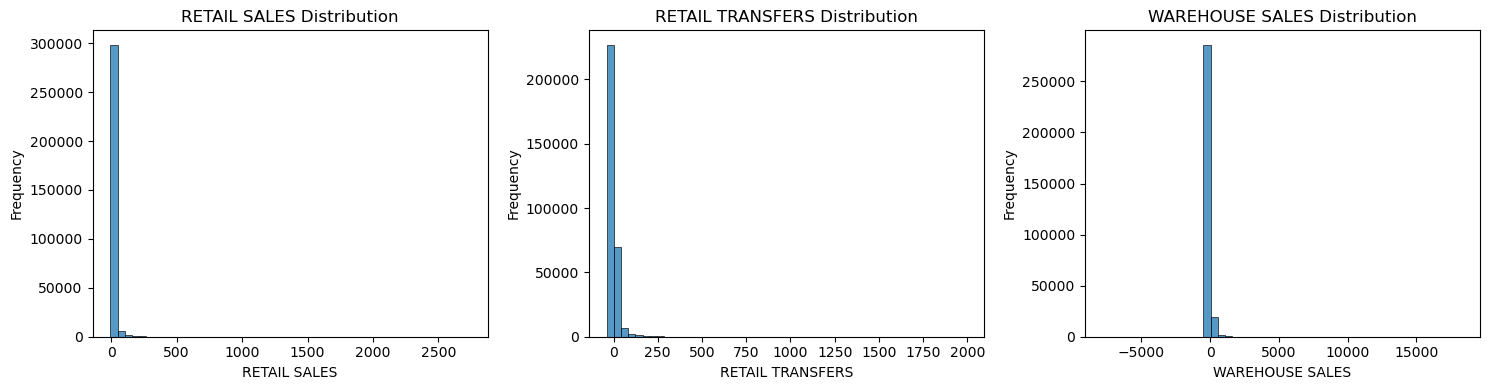

In [ ]:
# Plot histograms for key sales-related numerical features
# to examine distribution shape, skewness, and frequency of values
# prior to applying log transformation and scaling

sales_cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']

fig, axes = plt.subplots(1, 3, figsize=(15,4))

for ax, col in zip(axes, sales_cols):
    sns.histplot(df[col], bins=50, ax=ax)
    ax.set_title(f"{col} Distribution")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()



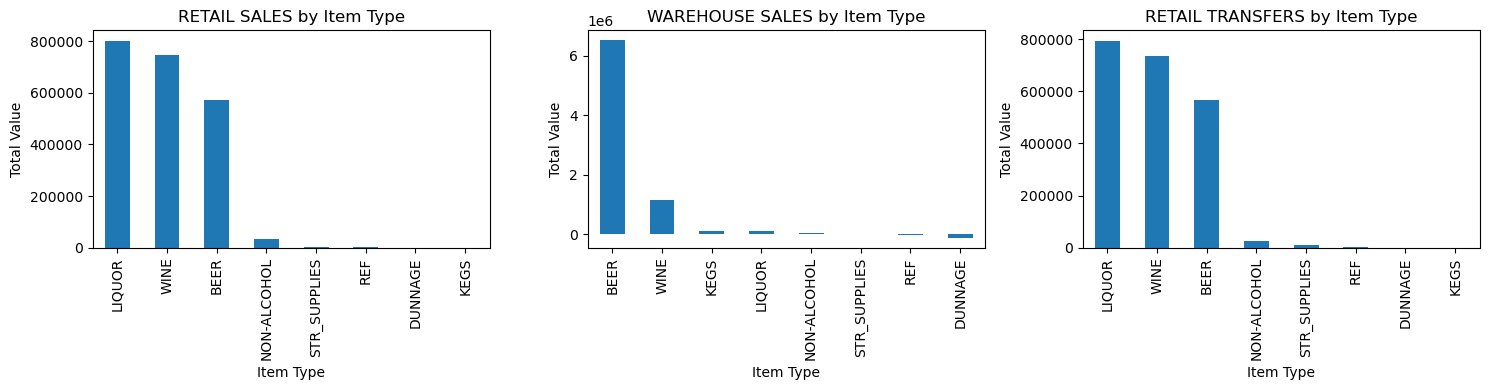

In [ ]:
# Visualize total retail sales, warehouse sales, and retail transfers
# aggregated by item type to compare category-level performance
# across demand and inventory movement metrics

sales_cols = ['RETAIL SALES', 'WAREHOUSE SALES', 'RETAIL TRANSFERS']
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for ax, col in zip(axes, sales_cols):
    item_type_metric = (
        df.groupby('ITEM TYPE')[col]
          .sum()
          .sort_values(ascending=False)
    )

    item_type_metric.plot(kind='bar', ax=ax)
    ax.set_title(f"{col} by Item Type")
    ax.set_xlabel("Item Type")
    ax.set_ylabel("Total Value")

plt.tight_layout()
plt.show()


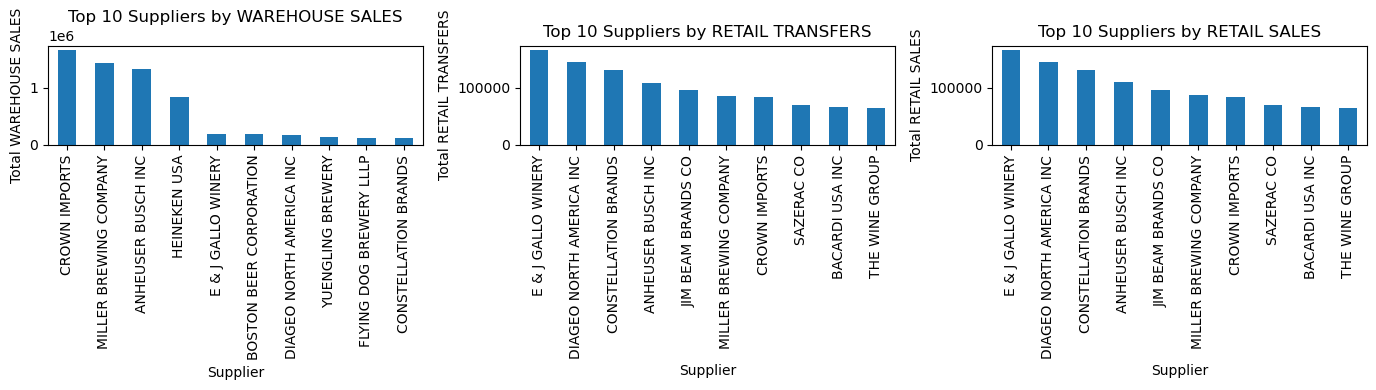

In [ ]:
# Create side-by-side bar charts to compare top suppliers across
# warehouse sales, retail transfers, and retail sales.
# This visualization highlights supplier-level contribution,
# channel dependency, and inventory movement patterns.

sales_cols = ['WAREHOUSE SALES', 'RETAIL TRANSFERS','RETAIL SALES']
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for ax, sales in zip(axes,sales_cols):
    supplier_metric = (
        df.groupby('SUPPLIER')[sales]
          .sum()
          .sort_values(ascending=False)
          .head(10)
    )

    supplier_metric.plot(kind='bar', ax=ax)
    ax.set_title(f"Top 10 Suppliers by {sales}")
    ax.set_ylabel(f"Total {sales}")
    ax.set_xlabel("Supplier")

plt.tight_layout()
plt.show()


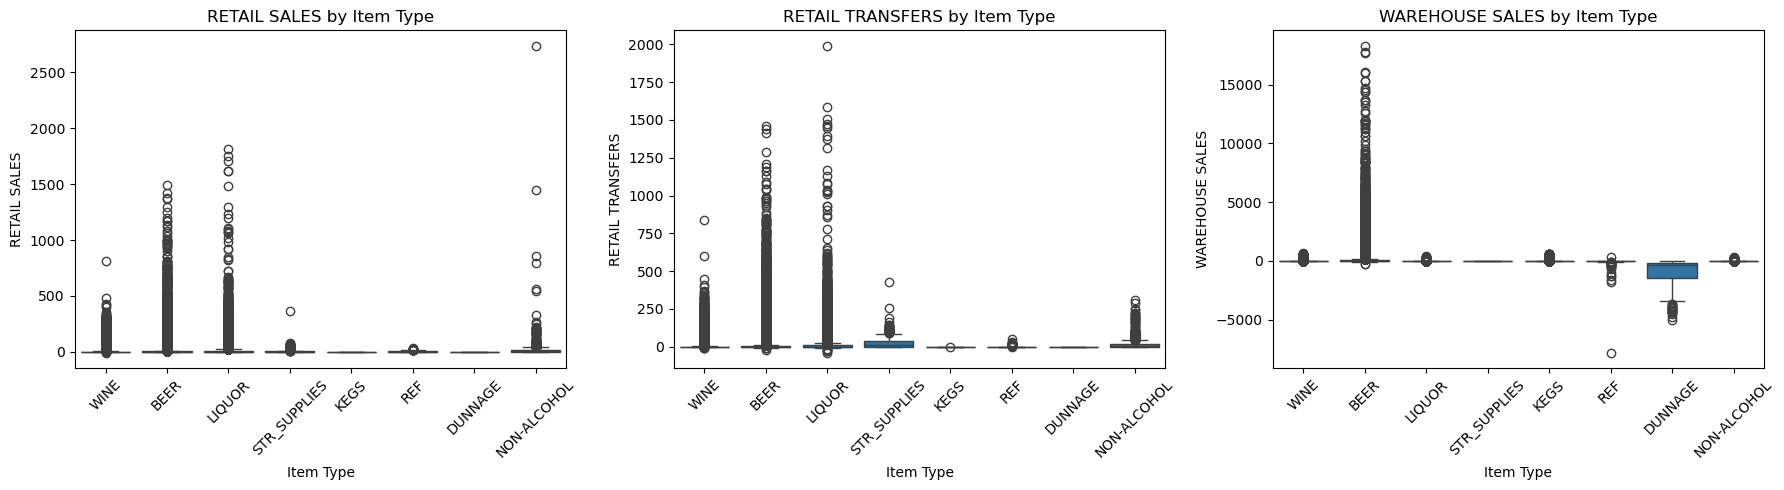

In [ ]:
# Generate boxplots for key sales-related metrics across item types
# to analyze category-level distribution, variability, and outlier behavior


sales_cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, sales_cols):
    sns.boxplot(
        x='ITEM TYPE',
        y=col,
        data=df,
        ax=ax
    )

    ax.set_title(f"{col} by Item Type")
    ax.set_xlabel("Item Type")
    ax.set_ylabel(col)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
 # Analyze zero-value distribution across sales-related features
# This helps identify structural zeros versus missing data
# and informs zero-aware feature engineering decisions

zero_summary = pd.DataFrame({
    'Zero Count': (df[['RETAIL SALES', 'WAREHOUSE SALES', 'RETAIL TRANSFERS']] == 0).sum(),
    'Zero Percentage (%)': (df[['RETAIL SALES', 'WAREHOUSE SALES', 'RETAIL TRANSFERS']] == 0).mean() * 100
})
print("\n🔹 Zero Value Summary:")
display(zero_summary)


🔹 Zero Value Summary:


,Zero Count,Zero Percentage (%)
RETAIL SALES,121702,39.559232
WAREHOUSE SALES,96950,31.513595
RETAIL TRANSFERS,188464,61.260219


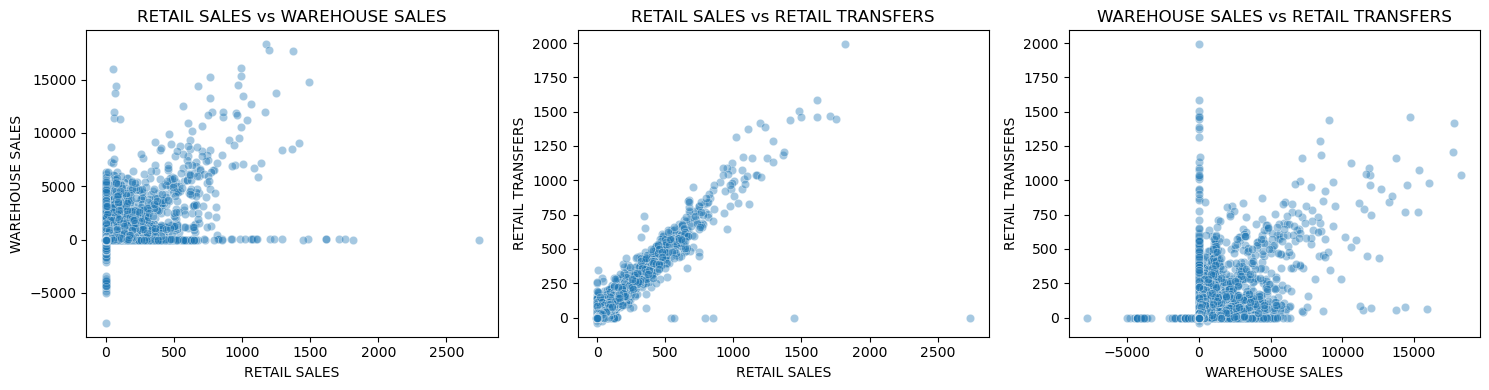

In [ ]:
# Visualize pairwise relationships between key sales metrics
# to compare demand (retail, warehouse) and inventory movement (transfers)
# and understand channel dependency before feature engineering and clustering

fig, axes = plt.subplots(1, 3, figsize=(15,4))

pairs = [
    ('RETAIL SALES', 'WAREHOUSE SALES'),
    ('RETAIL SALES', 'RETAIL TRANSFERS'),
    ('WAREHOUSE SALES', 'RETAIL TRANSFERS')
]

for ax, (x, y) in zip(axes, pairs):
    sns.scatterplot(
        x=df[x],
        y=df[y],
        alpha=0.4,
        ax=ax
    )
    ax.set_title(f"{x} vs {y}")
    ax.set_xlabel(x)
    ax.set_ylabel(y)

plt.tight_layout()
plt.show()


In [ ]:
#Retail vs Warehouse Contribution (%)
total_retail = df['RETAIL SALES'].sum()
total_wh = df['WAREHOUSE SALES'].sum()

pd.DataFrame({
    'Channel': ['Retail', 'Warehouse'],
    'Contribution %': [
        total_retail / (total_retail + total_wh) * 100,
        total_wh / (total_retail + total_wh) * 100
    ]
})


,Channel,Contribution %
0,Retail,21.733624
1,Warehouse,78.266376


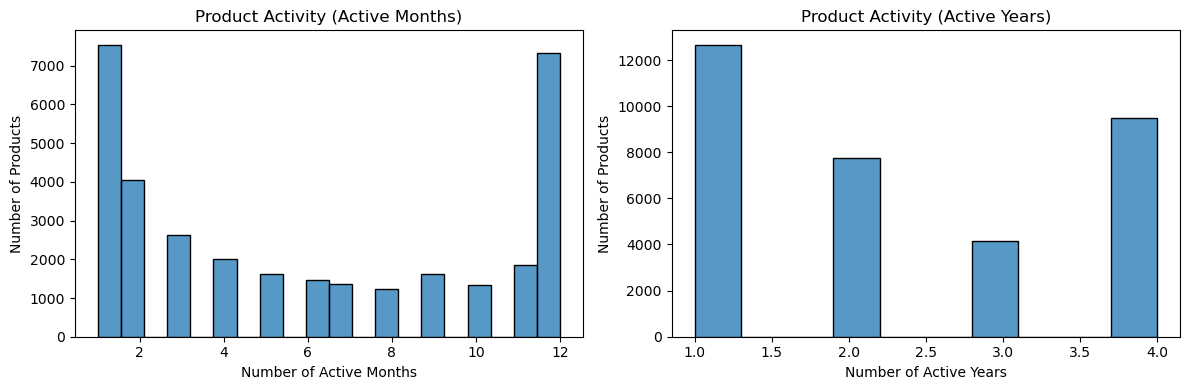

In [ ]:
# Calculate product activity by months and years
product_activity_months = df.groupby('ITEM CODE')['MONTH'].nunique()
product_activity_years = df.groupby('ITEM CODE')['YEAR'].nunique()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Active Months distribution
sns.histplot(product_activity_months, bins=20, ax=axes[0])
axes[0].set_title("Product Activity (Active Months)")
axes[0].set_xlabel("Number of Active Months")
axes[0].set_ylabel("Number of Products")

# Active Years distribution
sns.histplot(product_activity_years, bins=10, ax=axes[1])
axes[1].set_title("Product Activity (Active Years)")
axes[1].set_xlabel("Number of Active Years")
axes[1].set_ylabel("Number of Products")

plt.tight_layout()
plt.show()


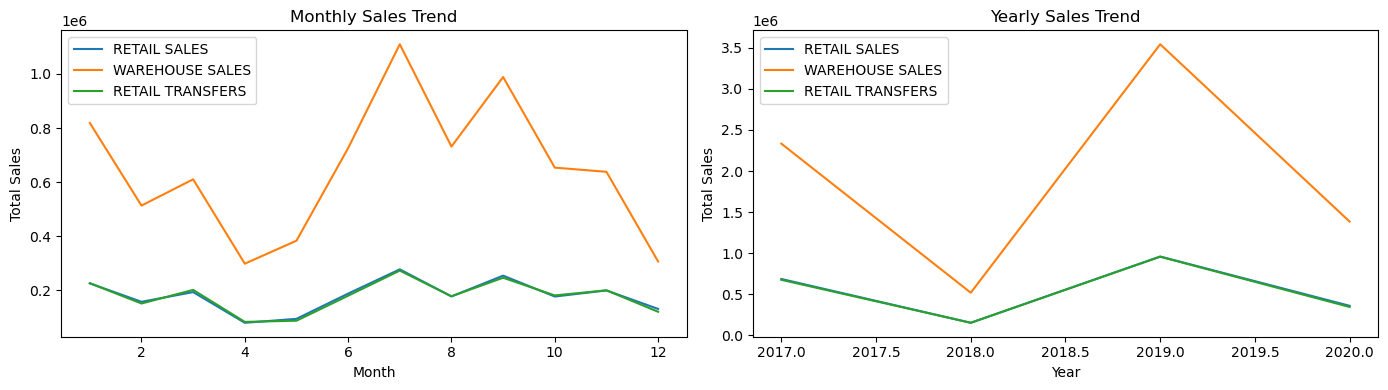

In [ ]:
# Visualize temporal trends in retail sales, warehouse sales, and retail transfers
# at both monthly and yearly levels to identify seasonality, long-term patterns,
# and time-based demand variability prior to feature engineering

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Monthly Sales Trend
monthly_sales = df.groupby('MONTH')[['RETAIL SALES', 'WAREHOUSE SALES','RETAIL TRANSFERS']].sum()
monthly_sales.plot(ax=axes[0])
axes[0].set_title("Monthly Sales Trend")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Total Sales")

# Yearly Sales Trend
yearly_sales = df.groupby('YEAR')[['RETAIL SALES', 'WAREHOUSE SALES','RETAIL TRANSFERS']].sum()
yearly_sales.plot(ax=axes[1])
axes[1].set_title("Yearly Sales Trend")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Total Sales")

plt.tight_layout()
plt.show()


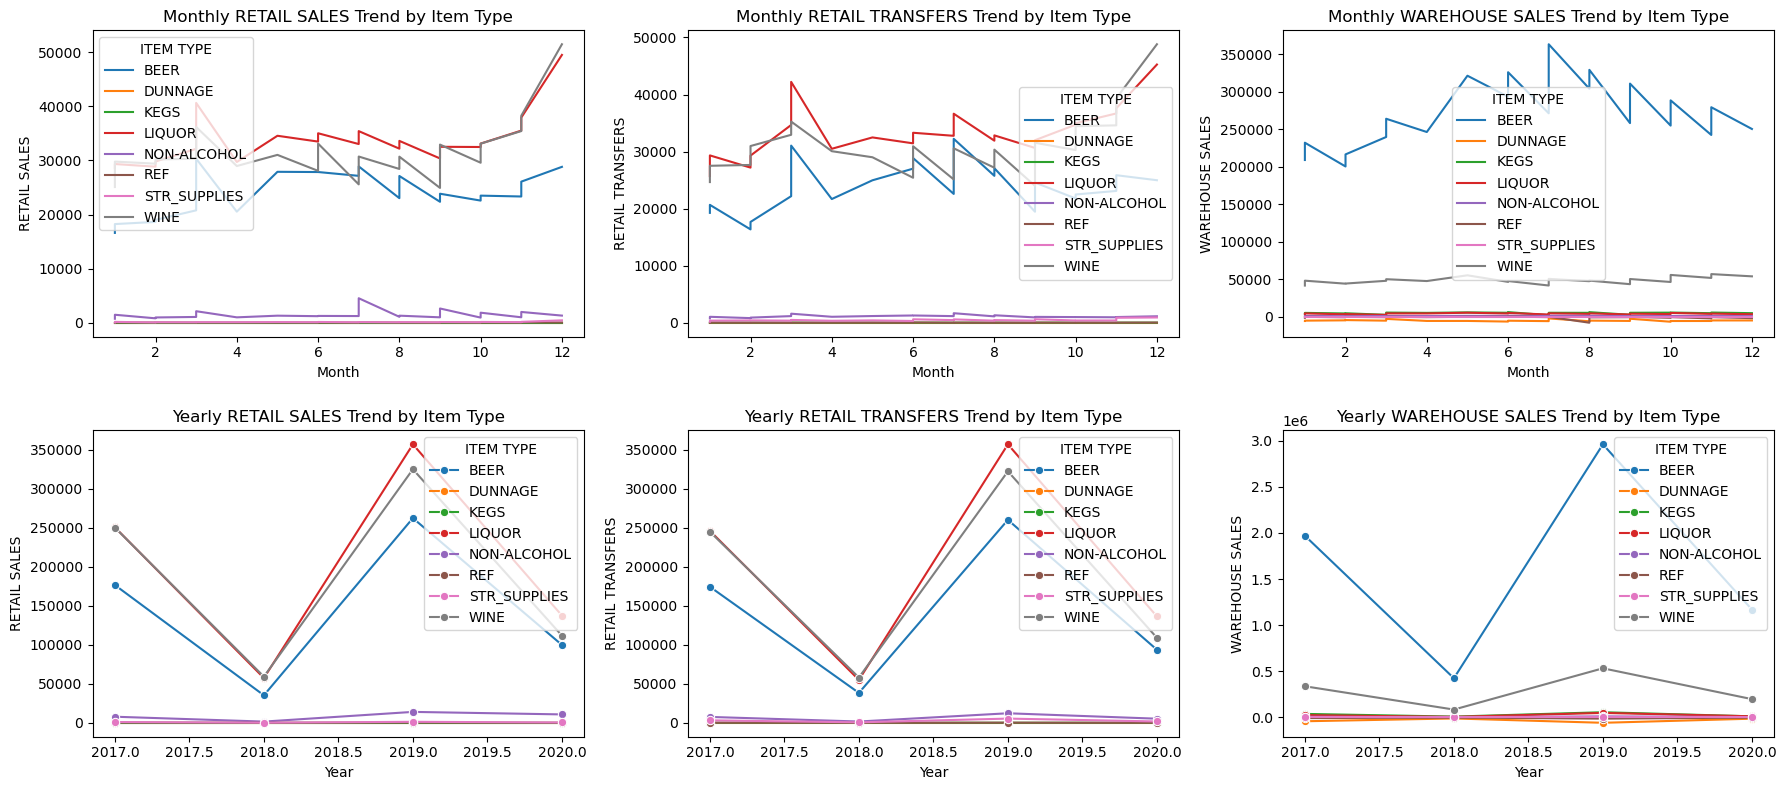

In [ ]:
# Visualize monthly and yearly trends for retail sales, warehouse sales,
# and retail transfers by item type using a unified subplot layout

# Aggregate monthly data
monthly_trend = (
    df.groupby(['YEAR', 'MONTH', 'ITEM TYPE'])[
        ['RETAIL SALES', 'WAREHOUSE SALES', 'RETAIL TRANSFERS']
    ]
    .sum()
    .reset_index()
)

# Aggregate yearly data
yearly_trend = (
    df.groupby(['YEAR', 'ITEM TYPE'])[
        ['RETAIL SALES', 'WAREHOUSE SALES', 'RETAIL TRANSFERS']
    ]
    .sum()
    .reset_index()
)

sales = ['RETAIL SALES', 'WAREHOUSE SALES', 'RETAIL TRANSFERS']

fig, axes = plt.subplots(2, 3, figsize=(18,8))

# ---- Monthly Trends (Row 0) ----
for i, sales in enumerate(sales_cols):
    sns.lineplot(
        data=monthly_trend,
        x='MONTH',
        y=sales,
        hue='ITEM TYPE',
        estimator=None,
        ax=axes[0, i]
    )
    axes[0, i].set_title(f"Monthly {sales} Trend by Item Type")
    axes[0, i].set_xlabel("Month")
    axes[0, i].set_ylabel(sales)

# ---- Yearly Trends (Row 1) ----
for i, sales in enumerate(sales_cols):
    sns.lineplot(
        data=yearly_trend,
        x='YEAR',
        y=sales,
        hue='ITEM TYPE',
        marker='o',
        ax=axes[1, i]
    )
    axes[1, i].set_title(f"Yearly {sales} Trend by Item Type")
    axes[1, i].set_xlabel("Year")
    axes[1, i].set_ylabel(sales)

plt.tight_layout()
plt.show()


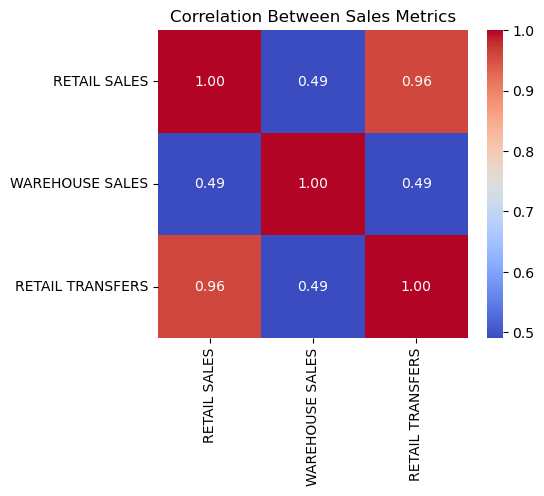

In [ ]:
# Compute and visualize the correlation between key numerical sales metrics
# to understand inter-feature relationships and channel dependency patterns
# prior to feature engineering and clustering

corr_cols = ['RETAIL SALES', 'WAREHOUSE SALES', 'RETAIL TRANSFERS']

corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(5,4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title("Correlation Between Sales Metrics")
plt.show()


In [ ]:
# Product-Level Clustering Using Monthly Sales Behavior
# Aggregate sales at Product-Month level
product_month_df = (
    df.groupby(['ITEM CODE', 'YEAR', 'MONTH'])
      .agg({
          'RETAIL SALES': 'sum',
          'WAREHOUSE SALES': 'sum',
          'RETAIL TRANSFERS': 'sum'
      })
      .reset_index()
)

product_month_df.head()


,ITEM CODE,YEAR,MONTH,RETAIL SALES,WAREHOUSE SALES,RETAIL TRANSFERS
0,100002,2017,7,0.17,0.0,0.0
1,100007,2019,4,0.00,1.0,0.0
2,100007,2019,5,0.00,1.0,0.0
3,100007,2019,10,0.00,1.0,0.0
4,100007,2019,11,0.00,1.0,0.0


In [ ]:
# Aggregate monthly behavior into product-level features
product_month_features = (
    product_month_df
    .groupby('ITEM CODE')
    .agg({
        'RETAIL SALES': ['mean', 'std', 'sum'],
        'WAREHOUSE SALES': ['mean', 'std', 'sum'],
        'RETAIL TRANSFERS': ['mean', 'sum'],
        'MONTH': 'nunique'
    })
    .reset_index()
)

# Rename columns
product_month_features.columns = [
    'ITEM_CODE',
    'AVG_MONTHLY_RETAIL_SALES',
    'STD_MONTHLY_RETAIL_SALES',
    'TOTAL_RETAIL_SALES',
    'AVG_MONTHLY_WAREHOUSE_SALES',
    'STD_MONTHLY_WAREHOUSE_SALES',
    'TOTAL_WAREHOUSE_SALES',
    'AVG_MONTHLY_RETAIL_TRANSFERS',
    'TOTAL_RETAIL_TRANSFERS',
    'ACTIVE_MONTHS'
]
product_month_features.head()


,ITEM_CODE,AVG_MONTHLY_RETAIL_SALES,STD_MONTHLY_RETAIL_SALES,TOTAL_RETAIL_SALES,AVG_MONTHLY_WAREHOUSE_SALES,STD_MONTHLY_WAREHOUSE_SALES,TOTAL_WAREHOUSE_SALES,AVG_MONTHLY_RETAIL_TRANSFERS,TOTAL_RETAIL_TRANSFERS,ACTIVE_MONTHS
0,100002,0.170000,NaN,0.17,0.000000,NaN,0.0,0.0,0.0,1
1,100007,0.000000,0.000000,0.00,1.000000,0.000000,4.0,0.0,0.0,4
2,100008,0.000000,0.000000,0.00,1.000000,1.000000,3.0,0.0,0.0,3
3,100009,0.132308,0.235908,1.72,1.384615,2.364264,18.0,0.0,0.0,7
4,100011,0.000000,0.000000,0.00,1.000000,0.000000,3.0,0.0,0.0,3


In [ ]:
# Examine the distribution of ACTIVE_MONTHS to understand
# product lifecycle duration and activity consistency across time

product_month_features['ACTIVE_MONTHS'].value_counts().head()
# Analysis of product activity duration revealed significant variation in lifecycle behavior.
# While a large set of products were active only in a single month, another substantial group showed consistent activity across all 12 months.
# This distribution highlights the presence of one-time, seasonal, and steady-demand products, justifying the use of monthly behavior features
# such as activity duration and demand variability for clustering.

ACTIVE_MONTHS
1     7539
12    7334
2     4044
3     2625
4     2005
Name: count, dtype: int64

In [ ]:
 # Handle NaN in STD Columns
# Replace NaN values in standard deviation features with 0
# NaNs occur for products active in only one month, where variability is undefined;
# setting them to 0 correctly represents no observed variation

std_cols = [
    'STD_MONTHLY_RETAIL_SALES',
    'STD_MONTHLY_WAREHOUSE_SALES'
]

product_month_features[std_cols] = (
    product_month_features[std_cols]
    .fillna(0)
)
product_month_features.head()

,ITEM_CODE,AVG_MONTHLY_RETAIL_SALES,STD_MONTHLY_RETAIL_SALES,TOTAL_RETAIL_SALES,AVG_MONTHLY_WAREHOUSE_SALES,STD_MONTHLY_WAREHOUSE_SALES,TOTAL_WAREHOUSE_SALES,AVG_MONTHLY_RETAIL_TRANSFERS,TOTAL_RETAIL_TRANSFERS,ACTIVE_MONTHS
0,100002,0.170000,0.000000,0.17,0.000000,0.000000,0.0,0.0,0.0,1
1,100007,0.000000,0.000000,0.00,1.000000,0.000000,4.0,0.0,0.0,4
2,100008,0.000000,0.000000,0.00,1.000000,1.000000,3.0,0.0,0.0,3
3,100009,0.132308,0.235908,1.72,1.384615,2.364264,18.0,0.0,0.0,7
4,100011,0.000000,0.000000,0.00,1.000000,0.000000,3.0,0.0,0.0,3


In [ ]:
# Zero-Flag Features (Business Interpretability)
# Create zero-flag features to explicitly capture products with no activity
# in retail sales, warehouse sales, or transfers.
# These flags preserve structural zero behavior and improve cluster interpretability.

product_month_features['RETAIL_ZERO_FLAG'] = (
    product_month_features['TOTAL_RETAIL_SALES'] == 0
).astype(int)

product_month_features['WAREHOUSE_ZERO_FLAG'] = (
    product_month_features['TOTAL_WAREHOUSE_SALES'] == 0
).astype(int)

product_month_features['TRANSFER_ZERO_FLAG'] = (
    product_month_features['TOTAL_RETAIL_TRANSFERS'] == 0
).astype(int)

In [ ]:

# Log Transformation

product_month_features['LOG_AVG_MONTHLY_RETAIL_SALES'] = np.log1p(
    product_month_features['AVG_MONTHLY_RETAIL_SALES'].clip(lower=0)
)

product_month_features['LOG_AVG_MONTHLY_WAREHOUSE_SALES'] = np.log1p(
    product_month_features['AVG_MONTHLY_WAREHOUSE_SALES'].clip(lower=0)
)


In [ ]:
# Feature Selection for Clustering
# Selected features represent:
# - Demand level (log averages)
# - Demand variability (std)
# - Product activity duration
# - Channel presence (zero flags)


features_monthly = product_month_features[
    [
        'LOG_AVG_MONTHLY_RETAIL_SALES',
        'LOG_AVG_MONTHLY_WAREHOUSE_SALES',
        'STD_MONTHLY_RETAIL_SALES',
        'STD_MONTHLY_WAREHOUSE_SALES',
        'ACTIVE_MONTHS',
        'RETAIL_ZERO_FLAG',
        'WAREHOUSE_ZERO_FLAG',
        'TRANSFER_ZERO_FLAG'
    ]
]

# Preview selected features
features_monthly.head()

,LOG_AVG_MONTHLY_RETAIL_SALES,LOG_AVG_MONTHLY_WAREHOUSE_SALES,STD_MONTHLY_RETAIL_SALES,STD_MONTHLY_WAREHOUSE_SALES,ACTIVE_MONTHS,RETAIL_ZERO_FLAG,WAREHOUSE_ZERO_FLAG,TRANSFER_ZERO_FLAG
0,0.157004,0.000000,0.000000,0.000000,1,0,1,1
1,0.000000,0.693147,0.000000,0.000000,4,1,0,1
2,0.000000,0.693147,0.000000,1.000000,3,1,0,1
3,0.124258,0.869038,0.235908,2.364264,7,0,0,1
4,0.000000,0.693147,0.000000,0.000000,3,1,0,1


In [ ]:
# Safety check to ensure clustering features contain no infinite or missing values.
# Any infinite values are converted to NaN and replaced with 0 to maintain
# numerical stability for scaling and distance-based clustering algorithms.

features_monthly = features_monthly.replace([np.inf, -np.inf], np.nan)
features_monthly = features_monthly.fillna(0)

np.isfinite(features_monthly).all().all()


np.True_

In [ ]:
#  Robust Scaling (Distance-safe)
scaler = RobustScaler()
scaled_monthly_features = scaler.fit_transform(features_monthly)

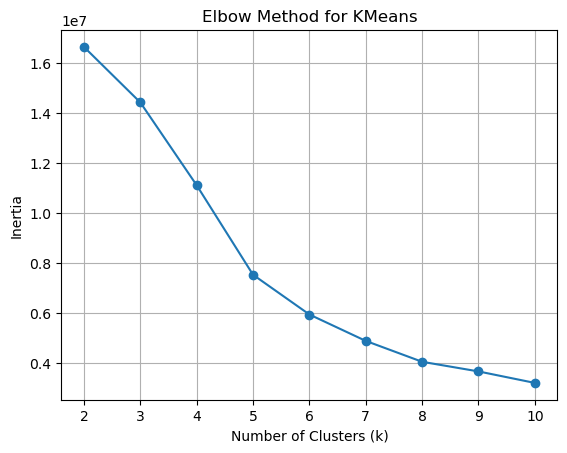

In [ ]:
# KMeans clustering parameter tuning

#Tune n_clusters using Elbow Method
inertia = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_monthly_features)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.grid(True)
plt.show()




In [ ]:
#Tune n_clusters using Silhouette Score
silhouette_scores = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_monthly_features)
    sil_score = silhouette_score(scaled_monthly_features, labels)
    silhouette_scores.append(sil_score)

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for KMeans")
plt.show()


In [ ]:
# Fit Final Tuned Model
kmeans = KMeans(n_clusters=2,
                random_state=42,
                n_init=20,             #better convergence
                max_iter=300)          # almost always sufficient

product_month_features['KMeans_Cluster'] = kmeans.fit_predict(scaled_monthly_features)


In [ ]:
# Final Model Evaluation
sil_kmeans = silhouette_score(scaled_monthly_features, product_month_features['KMeans_Cluster'])
db_kmeans = davies_bouldin_score(scaled_monthly_features, product_month_features['KMeans_Cluster'])

print("Silhouette Score:", sil_kmeans)
print("Davies Bouldin Index:", db_kmeans)


Silhouette Score: 0.9868192426498896
Davies Bouldin Index: 0.5836543165776965


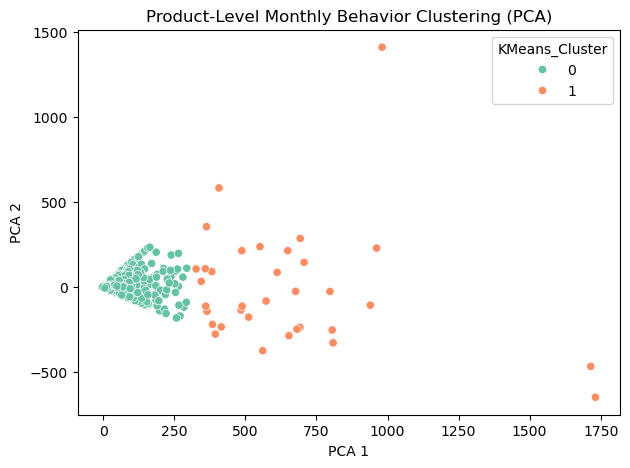

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_monthly_features)

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=pca_data[:,0],
    y=pca_data[:,1],
    hue=product_month_features['KMeans_Cluster'],
    palette='Set2'
)
plt.title("Product-Level Monthly Behavior Clustering (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [ ]:
# Hierarchical clustering – Parameter Tuning
#Tune n_clusters using Silhouette Score
hc_results = []
for k in k_range:
    hc = AgglomerativeClustering(
        n_clusters=k,
        linkage='ward'
    )
    labels = hc.fit_predict(scaled_monthly_features)
    sil = silhouette_score(scaled_monthly_features, labels)
    hc_results.append({
        'k': k,
        'Silhouette Score': sil
    })
hc_silhouette_df = pd.DataFrame(hc_results)
hc_silhouette_df

In [ ]:
# Plot Silhouette Scores
plt.figure(figsize=(6,4))
plt.plot(
    k_range,
    hc_silhouette_df['Silhouette Score'],
    marker='o'
)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Hierarchical Clustering: Silhouette Score vs k")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# fit Final Hierarchical Model
hc = AgglomerativeClustering(n_clusters=2,
                             random_state=42,
                             linkage='ward')
product_df['HC_Cluster'] = hc.fit_predict(scaled_features)


In [ ]:
# Hierarchical Model Evaluation
sil_hierarchical = silhouette_score(scaled_features, product_df['HC_Cluster'])
db_hierarchical = davies_bouldin_score(scaled_features, product_df['HC_Cluster'])
print("Silhouette Score:", sil_hierarchical)
print("Davies Bouldin Index:", db_hierarchical)

Silhouette Score: 0.6356587149594005
Davies Bouldin Index: 0.7739184073773545


In [ ]:
# DBSCAN Parameter Tuning (Behavior-Based Product Clustering)
# ----------------------------------------------------------
# This step evaluates multiple combinations of eps and min_samples to identify
# a stable density-based clustering configuration.
#
# DBSCAN is sensitive to parameter selection, so we assess each configuration
# using:
# - Number of clusters formed (excluding noise)
# - Percentage of noise points
# - Silhouette Score (computed only on non-noise points)
#
# This helps in identifying parameter values that produce meaningful clusters
# while minimizing excessive noise, enabling comparison with centroid-based
# models such as KMeans and Hierarchical clustering.
#
# Note:
# DBSCAN is used as a complementary model to detect irregular or outlier product
# behaviors rather than as the primary segmentation approach.


eps_values = [0.6, 0.8, 1.0, 1.2, 1.4]
min_samples_values = [4, 5, 7, 9]

dbscan_results = []

for eps in eps_values:
    for min_samp in min_samples_values:

        # Initialize DBSCAN
        dbscan = DBSCAN(
            eps=eps,
            min_samples=min_samp
        )

        # Fit model
        labels = dbscan.fit_predict(scaled_monthly_features)

        # Count clusters (excluding noise)
        unique_labels = set(labels)
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

        # Noise percentage
        noise_pct = (labels == -1).mean() * 100

        # Skip invalid cases
        if n_clusters < 2:
            sil_score = np.nan
        else:
            # Compute Silhouette Score excluding noise
            sil_score = silhouette_score(
                scaled_monthly_features[labels != -1],
                labels[labels != -1]
            )

        # Store results
        dbscan_results.append({
            'eps': eps,
            'min_samples': min_samp,
            'n_clusters': n_clusters,
            'noise_%': round(noise_pct, 2),
            'silhouette_score': round(sil_score, 3) if not np.isnan(sil_score) else np.nan
        })

# Convert to DataFrame
dbscan_results_df = pd.DataFrame(dbscan_results)

# Sort by Silhouette Score
dbscan_results_df = dbscan_results_df.sort_values(
    by='silhouette_score',
    ascending=False
)

dbscan_results_df


,eps,min_samples,clusters,noise_%,silhouette_score
6,1.0,7,2,0.11,0.756
2,0.8,7,6,0.27,0.210
3,0.8,9,6,0.37,0.209
0,0.8,4,6,0.17,0.200
1,0.8,5,7,0.18,0.197
4,1.0,4,1,0.08,NaN
5,1.0,5,1,0.09,NaN
7,1.0,9,1,0.19,NaN
8,1.2,4,1,0.04,NaN
9,1.2,5,1,0.05,NaN


In [ ]:
# Select Final DBSCAN Model parameters
best_params = dbscan_results_df.sort_values(
    by='silhouette_score', ascending=False
).iloc[0]

best_params


,6
eps,1.000
min_samples,7.000
clusters,2.000
noise_%,0.110
silhouette_score,0.756


In [ ]:
# Fit the final Model
dbscan_final = DBSCAN(
    eps=best_params['eps'],
    min_samples=int(best_params['min_samples'])
)
dbscan_labels = dbscan_final.fit_predict(scaled_features)
# Add to product-level dataframe
product_df['DBSCAN_CLUSTER'] = dbscan_labels



In [ ]:
# Model Evaluation

# Mask to remove noise points
mask = dbscan_labels != -1

# Number of clusters (excluding noise)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"Number of clusters (excluding noise): {n_clusters}")
print(f"Noise percentage: {(~mask).mean() * 100:.2f}%")

# Compute metrics only if valid clusters exist
if n_clusters > 1:
    sil_score_dbscan = silhouette_score(
        scaled_features[mask],
        dbscan_labels[mask]
    )

    db_score_dbscan = davies_bouldin_score(
        scaled_features[mask],
        dbscan_labels[mask]
    )

    print(f"Silhouette Score (DBSCAN): {sil_score_dbscan:.3f}")
    print(f"Davies-Bouldin Score (DBSCAN): {db_score_dbscan:.3f}")
else:
    print("Not enough clusters to compute evaluation metrics.")


Number of clusters (excluding noise): 2
Noise percentage: 0.11%
Silhouette Score (DBSCAN): 0.756
Davies-Bouldin Score (DBSCAN): 0.200


In [ ]:

# Model Comparison
comparison = pd.DataFrame({
    'Model': ['KMeans', 'Hierarchical','dbscan_final'],
    'Silhouette Score': [sil_kmeans, sil_hierarchical,sil_score_dbscan],
    'Davies Bouldin Index': [db_kmeans, db_hierarchical,db_score_dbscan]
})
display(comparison)



,Model,Silhouette Score,Davies Bouldin Index
0,KMeans,0.656298,0.718780
1,Hierarchical,0.635659,0.773918
2,dbscan_final,0.756179,0.199917


In [ ]:
# Cluster Size Distribution
cluster_counts = product_df['DBSCAN_CLUSTER'].value_counts().sort_index()
cluster_counts


,count
DBSCAN_CLUSTER,
-1,37
0,34014
1,5


In [ ]:
# Separate Noise vs Valid Clusters
clustered_df = product_df[product_df['DBSCAN_CLUSTER'] != -1]
noise_df = product_df[product_df['DBSCAN_CLUSTER'] == -1]

print("Clustered products:", clustered_df.shape[0])
print("Noise products:", noise_df.shape[0])


Clustered products: 34019
Noise products: 37


In [ ]:
# Cluster Profiling
cluster_profile = (
    product_df[product_df['DBSCAN_CLUSTER'] != -1]  # exclude noise
    .groupby('DBSCAN_CLUSTER')
    .agg({
        'AVG_RETAIL_SALES': 'mean',
        'TOTAL_RETAIL_SALES': 'sum',
        'AVG_WAREHOUSE_SALES': 'mean',
        'TOTAL_WAREHOUSE_SALES': 'sum',
        'AVG_RETAIL_TRANSFERS': 'mean',
        'TOTAL_RETAIL_TRANSFERS': 'sum',
        'ITEM_CODE': 'count',
        'ACTIVE_MONTHS': 'mean',
        'ACTIVE_YEARS': 'mean'
    })
    .reset_index()
)

cluster_profile


,DBSCAN_CLUSTER,AVG_RETAIL_SALES,TOTAL_RETAIL_SALES,AVG_WAREHOUSE_SALES,TOTAL_WAREHOUSE_SALES,AVG_RETAIL_TRANSFERS,TOTAL_RETAIL_TRANSFERS,ITEM_CODE,ACTIVE_MONTHS,ACTIVE_YEARS
0,0,2.742197,1958854.28,9.559598,6075971.04,2.731219,1940985.06,34014,5.996707,2.30752
1,1,94.642533,10690.75,3376.775633,361028.62,91.497500,10357.50,5,11.800000,3.60000


In [ ]:
# Business Interpretation Mapping
cluster_profile['CLUSTER_TYPE'] = [
    'High Activity / Core Products',
    'Low or Irregular Activity Products'
][:len(cluster_profile)]

cluster_profile


,DBSCAN_CLUSTER,AVG_RETAIL_SALES,TOTAL_RETAIL_SALES,AVG_WAREHOUSE_SALES,TOTAL_WAREHOUSE_SALES,AVG_RETAIL_TRANSFERS,TOTAL_RETAIL_TRANSFERS,ITEM_CODE,ACTIVE_MONTHS,ACTIVE_YEARS,CLUSTER_TYPE
0,0,2.742197,1958854.28,9.559598,6075971.04,2.731219,1940985.06,34014,5.996707,2.30752,High Activity / Core Products
1,1,94.642533,10690.75,3376.775633,361028.62,91.497500,10357.50,5,11.800000,3.60000,Low or Irregular Activity Products


In [ ]:
# Compare With KMeans
comparison_df = product_df[['KMeans_Cluster', 'DBSCAN_CLUSTER']].copy()
comparison_df.head()


,KMeans_Cluster,DBSCAN_CLUSTER
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


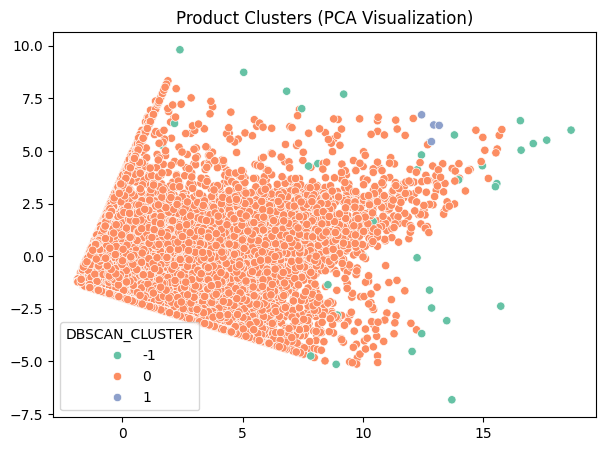

In [ ]:
# PCA Visualisation
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=pca_data[:,0],
    y=pca_data[:,1],
    hue=product_df['DBSCAN_CLUSTER'],
    palette='Set2'
)
plt.title("Product Clusters (PCA Visualization)")
plt.show()